# TMDB Movie Revenue Prediction

In [486]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [487]:
df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [488]:
df.shape

(3000, 23)

In [489]:
df.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

In [490]:
#df.head()

### Getting NaN values of every feature

In [491]:
print(df.isna().sum())

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64


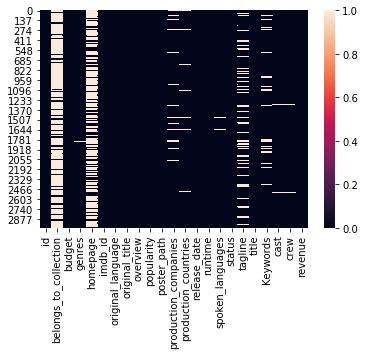

In [492]:
sb.heatmap(df.isnull(),)

In [493]:
df['original_title'].equals(df['title'])

False

In [494]:
df.drop(['overview','poster_path','tagline'],axis=1,inplace=True)
df.shape

(3000, 20)

In [495]:
test_df.drop(['overview','poster_path','tagline'],axis=1,inplace=True)
test_df.shape

(4398, 19)

## Adding additional features 

In [496]:
df2 = pd.read_csv('TrainAdditionalFeatures.csv')

In [497]:
df2.head()

,imdb_id,popularity2,rating,totalVotes
0,tt0169547,16.217,8.0,6016.0
1,tt0119116,26.326,7.4,5862.0
2,tt0325980,28.244,7.7,11546.0
3,tt0266697,18.202,7.9,8638.0
4,tt0418763,9.653,6.6,1201.0


In [498]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2887 entries, 0 to 2886
Data columns (total 4 columns):
imdb_id        2887 non-null object
popularity2    2882 non-null float64
rating         2882 non-null float64
totalVotes     2882 non-null float64
dtypes: float64(3), object(1)
memory usage: 90.3+ KB


## Final DataFrame

In [499]:
dfinal = pd.merge(df,df2[['imdb_id','popularity2','rating','totalVotes']],on = 'imdb_id',how = 'left')
dfinal.tail()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,title,Keywords,cast,crew,revenue,popularity2,rating,totalVotes
2995,2996,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0109403,en,Chasers,9.853270,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",4/22/94,102.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Chasers,"[{'id': 378, 'name': 'prison'}, {'id': 572, 'n...","[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687,5.109,5.2,41.0
2996,2997,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,tt2364975,sv,Vi är bäst!,3.727996,"[{'name': 'Memfis Film', 'id': 321}, {'name': ...","[{'iso_3166_1': 'DK', 'name': 'Denmark'}, {'is...",3/28/13,102.0,"[{'iso_639_1': 'sv', 'name': 'svenska'}]",Released,We Are the Best!,"[{'id': 1192, 'name': 'sweden'}, {'id': 4470, ...","[{'cast_id': 5, 'character': 'Bobo', 'credit_i...","[{'credit_id': '5716b72ac3a3686678012c84', 'de...",180590,4.086,7.0,74.0
2997,2998,NaN,65000000,"[{'id': 80, 'name': 'Crime'}, {'id': 28, 'name...",NaN,tt0116908,en,The Long Kiss Goodnight,14.482345,"[{'name': 'New Line Cinema', 'id': 12}, {'name...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/11/96,120.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Long Kiss Goodnight,"[{'id': 441, 'name': 'assassination'}, {'id': ...","[{'cast_id': 10, 'character': 'Samantha Caine ...","[{'credit_id': '52fe443a9251416c7502d579', 'de...",89456761,11.480,6.6,497.0
2998,2999,NaN,42000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",http://www.alongcamepolly.com/,tt0343135,en,Along Came Polly,15.725542,"[{'name': 'Jersey Films', 'id': 216}, {'name':...","[{'iso_3166_1': 'US', 'name': 'United States o...",1/16/04,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Along Came Polly,"[{'id': 966, 'name': 'beach'}, {'id': 2676, 'n...","[{'cast_id': 8, 'character': 'Reuben Feffer', ...","[{'credit_id': '556f817b9251410866000a63', 'de...",171963386,7.516,5.9,1349.0
2999,3000,NaN,35000000,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",http://www.abductionthefilm.com/,tt1600195,en,Abduction,10.512109,"[{'name': 'Lions Gate Films', 'id': 35}, {'nam...","[{'iso_3166_1': 'US', 'name': 'United States o...",9/22/11,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Abduction,"[{'id': 591, 'name': 'cia'}, {'id': 822, 'name...","[{'cast_id': 2, 'character': 'Nathan Harper', ...","[{'credit_id': '5391990d0e0a260fb5001629', 'de...",82087155,11.045,5.7,1675.0


In [500]:
additional_test = pd.read_csv('TestAdditionalFeatures.csv')

In [501]:
testfinal = pd.merge(test_df,additional_test[['imdb_id','popularity2','rating','totalVotes']],on = 'imdb_id',how = 'left')


In [502]:
testfinal.shape

(4398, 22)

In [503]:
dfinal.describe(include='all')

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,title,Keywords,cast,crew,revenue,popularity2,rating,totalVotes
count,3000.000000,604,3.000000e+03,2993,946,3000,3000,3000,3000.000000,2844,2945,3000,2998.000000,2980,3000,3000,2724,2987,2984,3.000000e+03,2882.000000,2882.000000,2882.000000
unique,NaN,422,NaN,872,941,3000,36,2975,NaN,2383,321,2398,NaN,401,2,2969,2648,2975,2984,NaN,NaN,NaN,NaN
top,NaN,"[{'id': 645, 'name': 'James Bond Collection', ...",NaN,"[{'id': 18, 'name': 'Drama'}]",http://www.transformersmovie.com/,tt0028333,en,The Double,NaN,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",9/10/15,NaN,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Beauty and the Beast,"[{'id': 10183, 'name': 'independent film'}]",[],"[{'credit_id': '52fe494bc3a36847f8192d15', 'de...",NaN,NaN,NaN,NaN
freq,NaN,16,NaN,266,4,1,2575,2,NaN,51,1752,5,NaN,1817,2996,2,27,13,1,NaN,NaN,NaN,NaN
mean,1500.500000,NaN,2.253133e+07,NaN,NaN,NaN,NaN,NaN,8.463274,NaN,NaN,NaN,107.856571,NaN,NaN,NaN,NaN,NaN,NaN,6.672585e+07,8.029303,6.366308,933.938584
std,866.169729,NaN,3.702609e+07,NaN,NaN,NaN,NaN,NaN,12.104000,NaN,NaN,NaN,22.086434,NaN,NaN,NaN,NaN,NaN,NaN,1.375323e+08,4.959153,0.887465,1795.101380
min,1.000000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000001,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,0.600000,1.000000,1.000000
25%,750.750000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,4.018053,NaN,NaN,NaN,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.379808e+06,5.046250,5.800000,82.000000
50%,1500.500000,NaN,8.000000e+06,NaN,NaN,NaN,NaN,NaN,7.374861,NaN,NaN,NaN,104.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.680707e+07,7.503500,6.400000,292.500000
75%,2250.250000,NaN,2.900000e+07,NaN,NaN,NaN,NaN,NaN,10.890983,NaN,NaN,NaN,118.000000,NaN,NaN,NaN,NaN,NaN,NaN,6.891920e+07,9.987000,7.000000,900.500000


In [504]:
print(dfinal.isna().sum())

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
popularity                  0
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
popularity2               118
rating                    118
totalVotes                118
dtype: int64


## Data Visualization

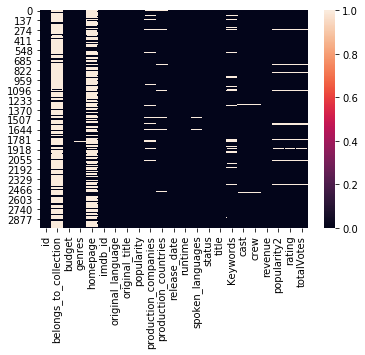

In [505]:
sb.heatmap(dfinal.isnull())

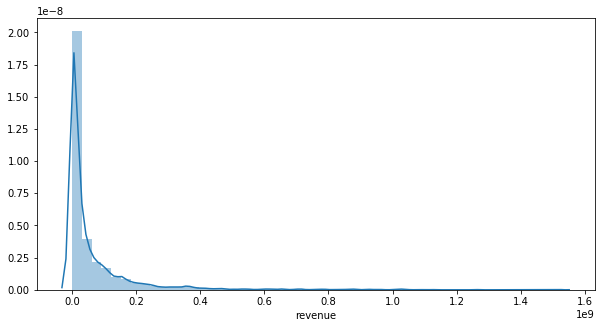

In [506]:
plt.figure(figsize = (10,5))
sb.distplot(dfinal.revenue);

(8, 35)

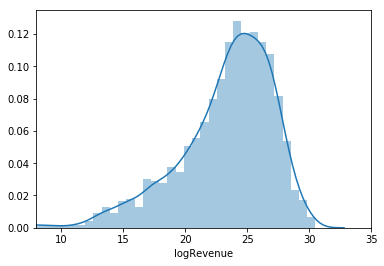

In [507]:
# Since revenue variable is skewed, so we'll calculate log of 
dfinal['logRevenue'] = np.log2(dfinal['revenue'])
#testfinal['logRevenue'] = np.log2(testfinal['revenue'])
fig, ax = plt.subplots()
sb.distplot(dfinal['logRevenue'])
ax.set_xlim(8,35)

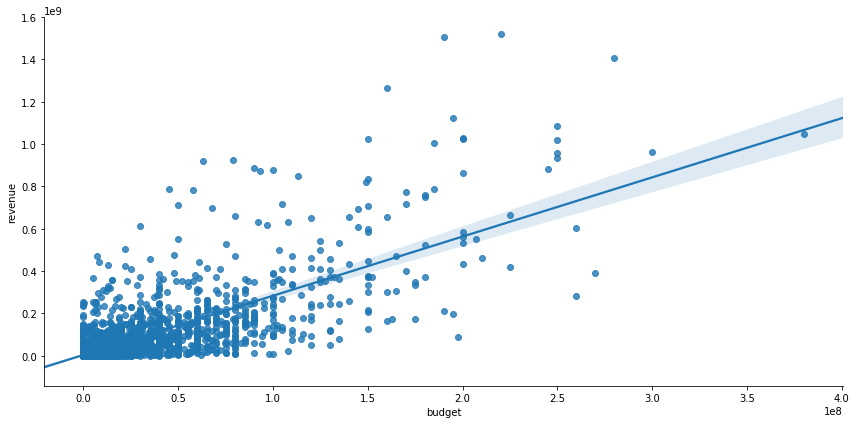

In [508]:

sb.lmplot(x = 'budget', y = 'revenue',data = dfinal,height=6,aspect=2)

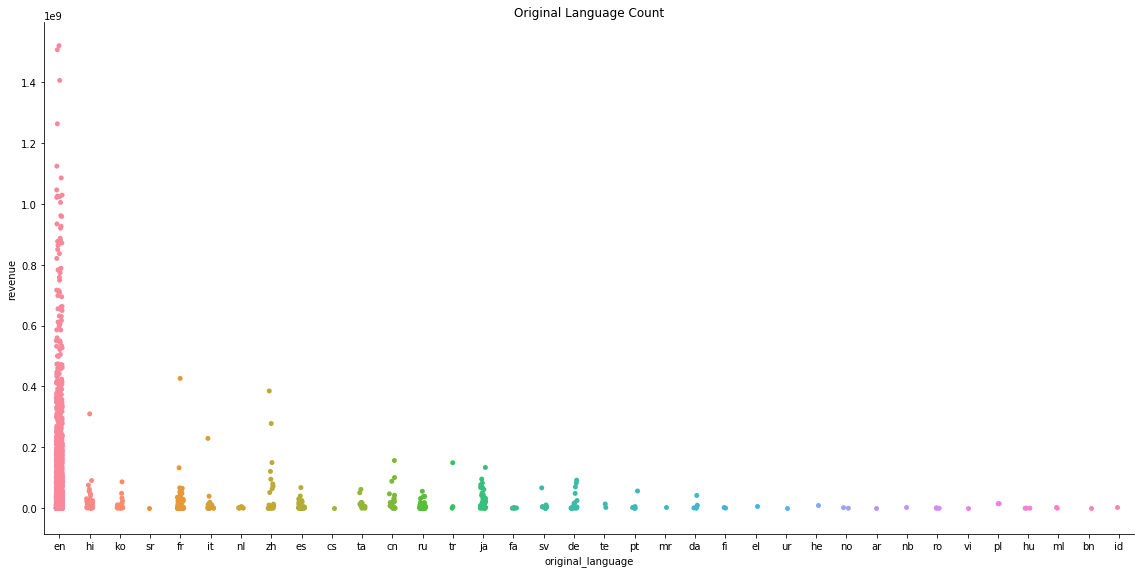

In [509]:

sb.catplot(x = 'original_language',y = 'revenue', data=dfinal,height=8,aspect=2)
plt.title("Original Language Count")
plt.show()

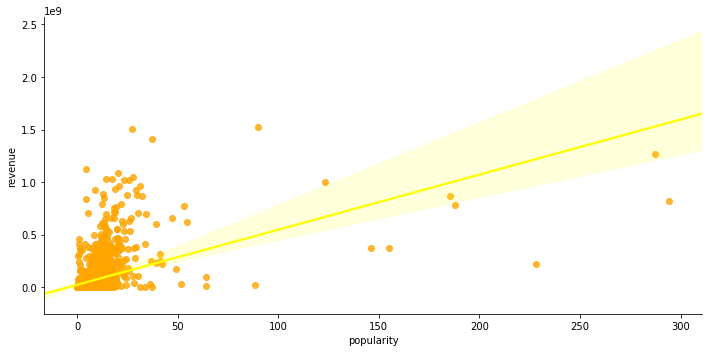

In [510]:
sb.lmplot(x='popularity',y = 'revenue',data=dfinal,height=5,aspect=2,scatter_kws={'color':'orange'},line_kws={'color':'yellow'})

In [511]:
from datetime import datetime

In [512]:
dfinal[['release_month','release_day','release_year']] = dfinal['release_date'].str.split('/',expand = True).replace(np.nan,-1).astype(int)

In [513]:
testfinal[['release_month','release_day','release_year']] = testfinal['release_date'].str.split('/',expand = True).replace(np.nan,-1).astype(int)

In [514]:
dfinal.loc[(dfinal['release_year']<=19) & (dfinal['release_year']<100),"release_year"]+=2000
dfinal.loc[(dfinal['release_year']>19) & (dfinal['release_year']<100),"release_year"]+=1900
releaseDate = pd.to_datetime(dfinal['release_date'])
dfinal['release_dayofweek'] = releaseDate.dt.dayofweek


In [515]:
testfinal.loc[(testfinal['release_year']<=19) & (testfinal['release_year']<100),"release_year"]+=2000
testfinal.loc[(testfinal['release_year']>19) & (testfinal['release_year']<100),"release_year"]+=1900
releaseDate = pd.to_datetime(testfinal['release_date'])
testfinal['release_dayofweek'] = releaseDate.dt.dayofweek


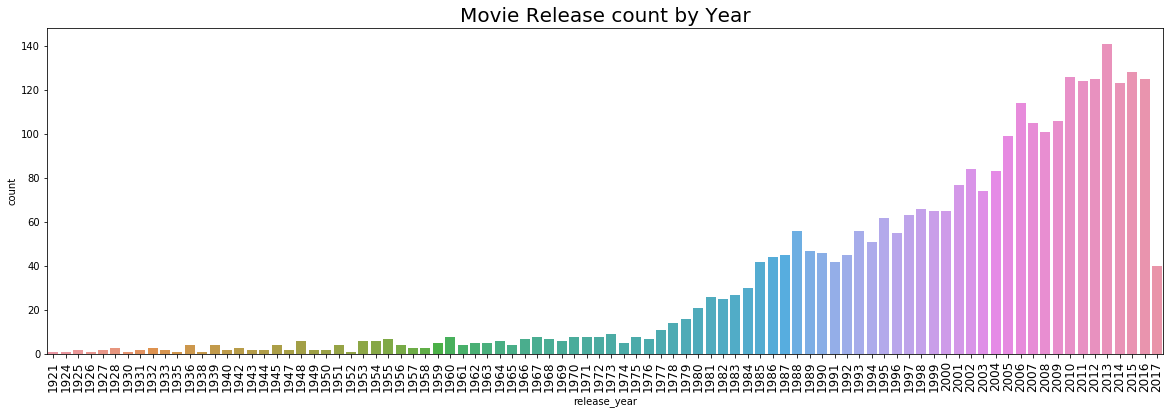

In [516]:
plt.figure(figsize=(20,6))
sb.countplot(dfinal['release_year'].sort_values())
plt.title("Movie Release count by Year",fontsize=20)
plt.xticks(fontsize=12,rotation=90)
plt.show()

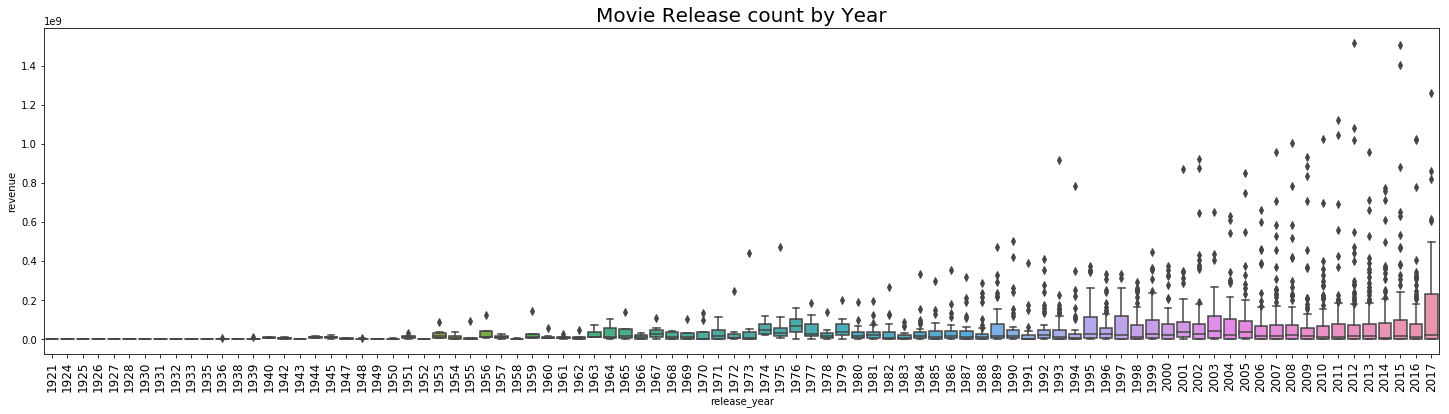

In [517]:
plt.figure(figsize=(25,6))
sb.boxplot(x = dfinal['release_year'], y = dfinal['revenue'])
plt.title("Movie Release count by Year",fontsize=20)
plt.xticks(fontsize=12,rotation=90)
plt.show()

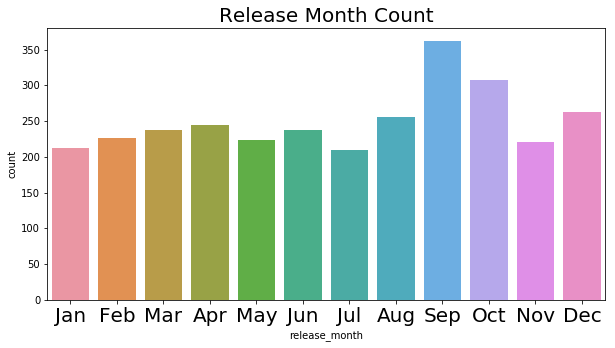

In [518]:
plt.figure(figsize=(10,5))
sb.countplot(dfinal['release_month'].sort_values())
plt.title("Release Month Count",fontsize=20)
loc,labels = plt.xticks()
loc,labels = loc, ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.xticks(loc, labels,fontsize=20)
plt.show()

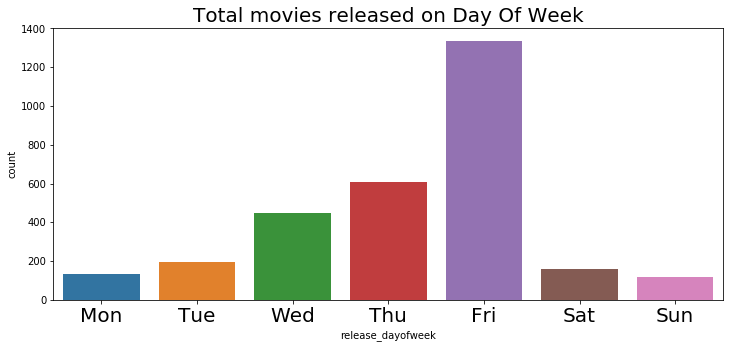

In [519]:
plt.figure(figsize=(12,5))
sb.countplot(dfinal['release_dayofweek'].sort_values())
plt.title("Total movies released on Day Of Week",fontsize=20)
loc, labels = plt.xticks()
loc, labels = loc, ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
plt.xticks(loc, labels,fontsize=20)
plt.show()

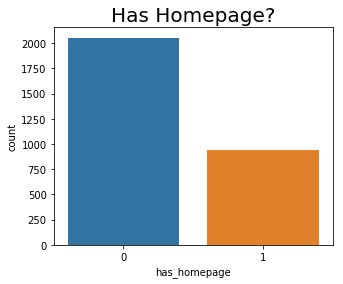

In [520]:
dfinal['has_homepage']=1
dfinal.loc[pd.isnull(dfinal['homepage']) ,"has_homepage"] = 0
plt.figure(figsize=(5,4))
sb.countplot(dfinal['has_homepage'].sort_values())
plt.title("Has Homepage?",fontsize=20)
plt.show()

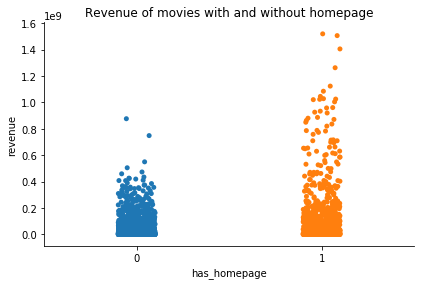

In [521]:
sb.catplot(x="has_homepage", y="revenue", data=dfinal,height=4,aspect=1.5)
plt.title('Revenue of movies with and without homepage');

In [522]:
testfinal['has_homepage']=1
testfinal.loc[pd.isnull(testfinal['homepage']) ,"has_homepage"] = 0

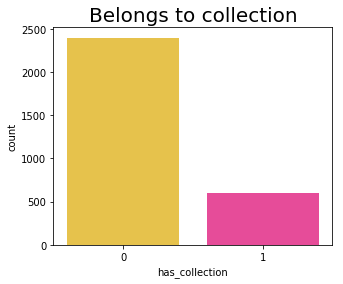

In [523]:
dfinal['has_collection']=1
dfinal.loc[pd.isnull(dfinal['belongs_to_collection']) ,"has_collection"] = 0
plt.figure(figsize=(5,4))
reds = ['#FFD033','#FF3399']
sb.countplot(dfinal['has_collection'].sort_values(),palette=reds)
plt.title("Belongs to collection",fontsize=20)
plt.show()

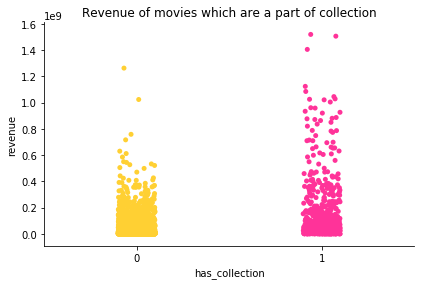

In [524]:
sb.catplot(x="has_collection", y="revenue", data=dfinal,height=4,aspect=1.5,palette=reds)
plt.title('Revenue of movies which are a part of collection');

In [525]:
testfinal['has_collection']=1
testfinal.loc[pd.isnull(testfinal['belongs_to_collection']) ,"has_collection"] = 0

C:\Users\amansahotra\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


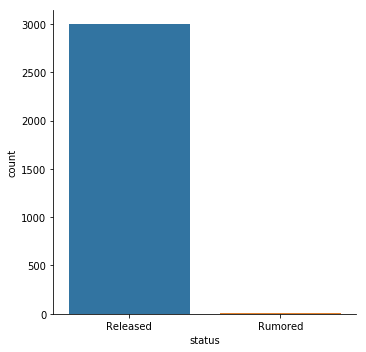

In [526]:
sb.factorplot('status',data=dfinal,kind='count')

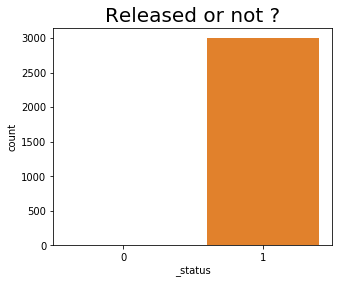

In [527]:
dfinal['_status']=1
dfinal._status.replace((dfinal['status']=="Rumored"),0,inplace=True)
plt.figure(figsize=(5,4))
sb.countplot(dfinal['_status'].sort_values())
plt.title("Released or not ?",fontsize=20)
plt.show()
dfinal.drop('status',axis=1,inplace=True)

In [528]:
testfinal['_status']=1
testfinal._status.replace((testfinal['status']=="Rumored"),0,inplace=True)


# Resolving features having JSON format

In [529]:
import ast

In [530]:
def train_function(argument):
    feature = dfinal[argument]
    result = []
    count = []
    for row_val in feature:
        if not pd.isnull(row_val):
            _list = ast.literal_eval(row_val)
            count.append(len(_list))
            for itr in _list:
                desired = itr['name']
                result.append(desired)
                break
        else:
            result.append(np.nan)
            count.append(np.nan)
    return result,count

In [531]:
def test_function(argument):
    feature = testfinal[argument]
    result = []
    count = []
    for row_val in feature:
        if not pd.isnull(row_val):
            _list = ast.literal_eval(row_val)
            count.append(len(_list))
            for itr in _list:
                desired = itr['name']
                result.append(desired)
                break
        else:
            result.append(np.nan)
            count.append(np.nan)
    return result,count

In [532]:
result,count = train_function('genres')
dfinal['_genres'] = result
dfinal['_total_genres']=count

In [533]:
result,count = test_function('genres')
testfinal['_genres'] = result
testfinal['_total_genres']=count


In [534]:
result,count = train_function('production_companies')
dfinal['_production_company'] = result
dfinal['_total_prod_comp'] = count

In [535]:
result,count = test_function('production_companies')
testfinal['_production_company'] = result
testfinal['_total_prod_comp'] = count

In [536]:
result,count = train_function('production_countries')
dfinal['_production_country'] = result
dfinal['_total_prod_countries'] = count

In [537]:
result,count = test_function('production_countries')
testfinal['_production_country'] = result
testfinal['_total_prod_countries'] = count

In [538]:
result,count = train_function('spoken_languages')
dfinal['_spoken_languages'] = result
dfinal['_total_spoken_languages'] = count

In [539]:
result,count = test_function('spoken_languages')
testfinal['_spoken_languages'] = result
testfinal['_total_spoken_languages'] = count

In [540]:
result,count = train_function('Keywords')
dfinal['_keywords'] = result

In [541]:
result,count = test_function('Keywords')
testfinal['_keywords'] = result

In [542]:
result,count = train_function('crew')
dfinal['_director'] = result


In [543]:
result,count = test_function('crew')
testfinal['_director'] = result


In [544]:
def train_function2(argument):
    feature = dfinal[argument]
    result = []
    count = []
    for row_val in feature:
        if not pd.isnull(row_val):
            _list = ast.literal_eval(row_val)
            if(_list == []):
                result.append(np.nan)
            count.append(len(_list))
            for itr in _list:
                desired = itr['name']
                result.append(desired)
                break
        else:
            result.append(np.nan)
            count.append(np.nan)
    return result,count

In [545]:
def test_function2(argument):
    feature = testfinal[argument]
    result = []
    count = []
    for row_val in feature:
        if not pd.isnull(row_val):
            _list = ast.literal_eval(row_val)
            if(_list == []):
                result.append(np.nan)
            count.append(len(_list))
            for itr in _list:
                desired = itr['name']
                result.append(desired)
                break
        else:
            result.append(np.nan)
            count.append(np.nan)
    return result,count

In [546]:
result,count = train_function2('cast')
dfinal['_lead'] = result


In [547]:
result,count = test_function2('cast')
testfinal['_lead'] = result


## Deleting JSON columns

In [548]:
col = ['belongs_to_collection','genres','homepage','imdb_id','production_companies','production_countries','release_date','spoken_languages','Keywords','cast','crew']
dfinal.drop(col,axis=1,inplace=True)

In [549]:
col = ['belongs_to_collection','genres','homepage','imdb_id','production_companies','production_countries','release_date','spoken_languages','Keywords','cast','crew']
testfinal.drop(col,axis=1,inplace=True)

In [550]:
dfinal.columns

Index(['id', 'budget', 'original_language', 'original_title', 'popularity',
       'runtime', 'title', 'revenue', 'popularity2', 'rating', 'totalVotes',
       'logRevenue', 'release_month', 'release_day', 'release_year',
       'release_dayofweek', 'has_homepage', 'has_collection', '_status',
       '_genres', '_total_genres', '_production_company', '_total_prod_comp',
       '_production_country', '_total_prod_countries', '_spoken_languages',
       '_total_spoken_languages', '_keywords', '_director', '_lead'],
      dtype='object')

In [551]:
dfinal.head()

,id,budget,original_language,original_title,popularity,runtime,title,revenue,popularity2,rating,totalVotes,logRevenue,release_month,release_day,release_year,release_dayofweek,has_homepage,has_collection,_status,_genres,_total_genres,_production_company,_total_prod_comp,_production_country,_total_prod_countries,_spoken_languages,_total_spoken_languages,_keywords,_director,_lead
0,1,14000000,en,Hot Tub Time Machine 2,6.575393,93.0,Hot Tub Time Machine 2,12314651,10.400,5.0,482.0,23.553872,2,20,2015,4,0,1,1,Comedy,1.0,Paramount Pictures,3.0,United States of America,1.0,English,1.0,time travel,Kelly Cantley,Rob Corddry
1,2,40000000,en,The Princess Diaries 2: Royal Engagement,8.248895,113.0,The Princess Diaries 2: Royal Engagement,95149435,15.229,6.4,1528.0,26.503692,8,6,2004,4,0,1,1,Comedy,4.0,Walt Disney Pictures,1.0,United States of America,1.0,English,1.0,coronation,Garry Marshall,Anne Hathaway
2,3,3300000,en,Whiplash,64.299990,105.0,Whiplash,13092000,26.082,8.4,7314.0,23.642182,10,10,2014,4,1,0,1,Drama,1.0,Bold Films,3.0,United States of America,1.0,English,1.0,jazz,Terri Taylor,Miles Teller
3,4,1200000,hi,Kahaani,3.174936,122.0,Kahaani,16000000,5.531,7.5,115.0,23.931569,3,9,2012,4,1,0,1,Thriller,2.0,NaN,NaN,India,1.0,English,2.0,mystery,Sujoy Ghosh,Vidya Balan
4,5,0,ko,마린보이,1.148070,118.0,Marine Boy,3923970,NaN,NaN,NaN,21.903883,2,5,2009,3,0,0,1,Action,2.0,NaN,NaN,South Korea,1.0,한국어/조선말,1.0,NaN,Jong-seok Yoon,Kim Kang-woo


## Modifying feature values to consider top 10 enteries

In [552]:
print(dfinal.isna().sum())

id                           0
budget                       0
original_language            0
original_title               0
popularity                   0
runtime                      2
title                        0
revenue                      0
popularity2                118
rating                     118
totalVotes                 118
logRevenue                   0
release_month                0
release_day                  0
release_year                 0
release_dayofweek            0
has_homepage                 0
has_collection               0
_status                      0
_genres                      7
_total_genres                7
_production_company        156
_total_prod_comp           156
_production_country         55
_total_prod_countries       55
_spoken_languages           20
_total_spoken_languages     20
_keywords                  276
_director                   16
_lead                       26
dtype: int64


In [553]:
def train_modifier(argument,freq,cutoff):
    feature = dfinal[argument]
    arr = []
    for row_val in feature:
        if not pd.isnull(row_val):
            if(freq[row_val]<cutoff):
                row_val = 'others'
            arr.append(row_val)
        else:
            arr.append('NotKnown')
    return arr
    

In [554]:
def test_modifier(argument,freq,cutoff):
    feature = testfinal[argument]
    arr = []
    for row_val in feature:
        if not pd.isnull(row_val):
            if(freq[row_val]<cutoff):
                row_val = 'others'
            arr.append(row_val)
        else:
            arr.append('NotKnown')
    return arr
    

In [555]:
counts = dfinal['original_language'].value_counts().to_dict()

In [556]:
counts

{'en': 2575,
 'fr': 78,
 'ru': 47,
 'es': 43,
 'hi': 42,
 'ja': 37,
 'it': 24,
 'ko': 20,
 'cn': 20,
 'zh': 19,
 'de': 18,
 'ta': 16,
 'sv': 8,
 'pt': 6,
 'nl': 6,
 'da': 5,
 'fa': 5,
 'ro': 4,
 'hu': 3,
 'tr': 3,
 'pl': 2,
 'ml': 2,
 'fi': 2,
 'no': 2,
 'te': 2,
 'cs': 1,
 'he': 1,
 'id': 1,
 'nb': 1,
 'sr': 1,
 'ur': 1,
 'ar': 1,
 'mr': 1,
 'vi': 1,
 'el': 1,
 'bn': 1}

In [557]:
count

[7,
 10,
 9,
 23,
 4,
 9,
 25,
 8,
 18,
 24,
 8,
 18,
 10,
 9,
 25,
 7,
 18,
 41,
 24,
 136,
 20,
 33,
 15,
 6,
 20,
 27,
 13,
 13,
 8,
 15,
 27,
 9,
 3,
 0,
 131,
 62,
 21,
 10,
 25,
 4,
 18,
 15,
 20,
 13,
 56,
 11,
 35,
 15,
 9,
 19,
 9,
 13,
 14,
 9,
 24,
 5,
 21,
 34,
 9,
 47,
 12,
 17,
 36,
 37,
 37,
 47,
 27,
 18,
 17,
 16,
 13,
 29,
 11,
 5,
 19,
 15,
 59,
 40,
 15,
 14,
 17,
 12,
 37,
 13,
 4,
 21,
 15,
 3,
 30,
 18,
 8,
 19,
 16,
 16,
 24,
 23,
 143,
 7,
 26,
 8,
 9,
 11,
 15,
 11,
 18,
 19,
 92,
 25,
 14,
 68,
 11,
 15,
 43,
 20,
 13,
 37,
 7,
 11,
 21,
 21,
 7,
 26,
 17,
 11,
 11,
 11,
 21,
 38,
 50,
 14,
 13,
 8,
 15,
 11,
 11,
 9,
 12,
 13,
 13,
 11,
 10,
 10,
 17,
 11,
 37,
 15,
 9,
 13,
 7,
 12,
 16,
 24,
 11,
 11,
 34,
 13,
 37,
 19,
 8,
 16,
 12,
 17,
 80,
 4,
 6,
 4,
 40,
 6,
 19,
 31,
 43,
 22,
 6,
 10,
 15,
 26,
 31,
 30,
 17,
 14,
 22,
 17,
 11,
 15,
 11,
 22,
 14,
 8,
 46,
 32,
 22,
 7,
 74,
 26,
 15,
 21,
 44,
 21,
 17,
 15,
 9,
 6,
 18,
 16,
 20,
 47,
 23,
 20,

In [558]:
result = train_modifier('original_language',counts,15)
len(result)
dfinal['original_language'] = result
dfinal['original_language'].describe()

count     3000
unique      13
top         en
freq      2575
Name: original_language, dtype: object

In [559]:
counts = testfinal['original_language'].value_counts().to_dict()

In [560]:
counts

{'en': 3776,
 'fr': 121,
 'hi': 76,
 'ru': 62,
 'ja': 53,
 'es': 52,
 'it': 32,
 'de': 31,
 'ko': 29,
 'zh': 27,
 'cn': 21,
 'ta': 15,
 'da': 12,
 'sv': 12,
 'ml': 10,
 'pt': 7,
 'te': 7,
 'tr': 6,
 'he': 5,
 'ro': 5,
 'th': 5,
 'nl': 5,
 'pl': 3,
 'no': 3,
 'fi': 2,
 'el': 2,
 'cs': 2,
 'sr': 2,
 'bn': 2,
 'xx': 2,
 'bm': 2,
 'id': 2,
 'is': 1,
 'kn': 1,
 'ka': 1,
 'ur': 1,
 'hu': 1,
 'af': 1,
 'ca': 1}

In [561]:
result = test_modifier('original_language',counts,14)
len(result)
testfinal['original_language'] = result
testfinal['original_language'].describe()

count     4398
unique      13
top         en
freq      3776
Name: original_language, dtype: object

In [562]:
counts = dfinal['_production_company'].value_counts().to_dict()

In [563]:
counts

{'Universal Pictures': 167,
 'Paramount Pictures': 158,
 'Twentieth Century Fox Film Corporation': 122,
 'Columbia Pictures': 90,
 'Warner Bros.': 70,
 'New Line Cinema': 69,
 'Walt Disney Pictures': 62,
 'Columbia Pictures Corporation': 44,
 'TriStar Pictures': 44,
 'United Artists': 41,
 'Metro-Goldwyn-Mayer (MGM)': 40,
 'Miramax Films': 38,
 'Fox Searchlight Pictures': 29,
 'Touchstone Pictures': 28,
 'Village Roadshow Pictures': 28,
 'BBC Films': 27,
 'Orion Pictures': 24,
 'Hollywood Pictures': 21,
 'Summit Entertainment': 21,
 'DreamWorks SKG': 18,
 'Lionsgate': 18,
 'StudioCanal': 13,
 'Imagine Entertainment': 13,
 'Fox 2000 Pictures': 12,
 'Lions Gate Films': 12,
 'Regency Enterprises': 12,
 'The Weinstein Company': 11,
 'Lakeshore Entertainment': 11,
 'France 2 Cinéma': 10,
 'Castle Rock Entertainment': 10,
 'Dune Entertainment': 10,
 'Legendary Pictures': 10,
 'Cannon Group': 10,
 'Eon Productions': 9,
 'Gaumont': 9,
 'Silver Pictures': 8,
 'Universal Studios': 8,
 'WingNut F

In [564]:
result = train_modifier('_production_company',counts,37)
len(result)
dfinal['_production_company'] = result
#dfinal['_production_company'].describe()

In [565]:
counts = testfinal['_production_company'].value_counts().to_dict()
#counts

In [566]:
counts

{'Universal Pictures': 234,
 'Paramount Pictures': 231,
 'Twentieth Century Fox Film Corporation': 169,
 'Columbia Pictures': 145,
 'New Line Cinema': 118,
 'Warner Bros.': 92,
 'Walt Disney Pictures': 84,
 'Metro-Goldwyn-Mayer (MGM)': 69,
 'Columbia Pictures Corporation': 61,
 'United Artists': 60,
 'Miramax Films': 60,
 'TriStar Pictures': 52,
 'Village Roadshow Pictures': 46,
 'DreamWorks SKG': 44,
 'Fox Searchlight Pictures': 39,
 'Touchstone Pictures': 31,
 'Orion Pictures': 30,
 'Regency Enterprises': 30,
 'Summit Entertainment': 29,
 'Imagine Entertainment': 27,
 'Lions Gate Films': 26,
 'The Weinstein Company': 25,
 'Lionsgate': 21,
 'Dimension Films': 21,
 'BBC Films': 19,
 'Hollywood Pictures': 19,
 'Lakeshore Entertainment': 18,
 'StudioCanal': 17,
 'Lucasfilm': 14,
 'Walt Disney Productions': 14,
 'RKO Radio Pictures': 14,
 'DreamWorks Animation': 13,
 'Gaumont': 13,
 'Amblin Entertainment': 13,
 'France 2 Cinéma': 12,
 'Ingenious Film Partners': 12,
 'Ingenious Media': 12,

In [567]:
result = test_modifier('_production_company',counts,51)
len(result)
testfinal['_production_company'] = result
#dfinal['_production_company'].describe()

In [568]:
counts = dfinal['_genres'].value_counts().to_dict()
#counts

In [569]:
counts

{'Drama': 785,
 'Comedy': 604,
 'Action': 520,
 'Adventure': 187,
 'Horror': 170,
 'Crime': 147,
 'Thriller': 116,
 'Animation': 76,
 'Documentary': 71,
 'Fantasy': 68,
 'Romance': 67,
 'Science Fiction': 41,
 'Family': 36,
 'Mystery': 33,
 'War': 20,
 'Music': 20,
 'History': 16,
 'Western': 13,
 'Foreign': 2,
 'TV Movie': 1}

In [570]:
result = train_modifier('_genres',counts,50)
dfinal['_genres'] = result
dfinal['_genres'].describe()

count      3000
unique       13
top       Drama
freq        785
Name: _genres, dtype: object

In [571]:
counts = testfinal['_genres'].value_counts().to_dict()
#counts

In [572]:
counts

{'Drama': 1149,
 'Comedy': 964,
 'Action': 675,
 'Adventure': 287,
 'Horror': 233,
 'Crime': 186,
 'Thriller': 143,
 'Documentary': 117,
 'Fantasy': 114,
 'Animation': 112,
 'Romance': 109,
 'Science Fiction': 75,
 'Mystery': 58,
 'Family': 43,
 'Western': 31,
 'War': 30,
 'Music': 29,
 'History': 23,
 'Foreign': 4}

In [573]:
result = test_modifier('_genres',counts,100)
testfinal['_genres'] = result
testfinal['_genres'].describe()

count      4398
unique       13
top       Drama
freq       1149
Name: _genres, dtype: object

In [574]:
counts = dfinal['_production_country'].value_counts().to_dict()
#counts

In [575]:
counts

{'United States of America': 1818,
 'United Kingdom': 234,
 'France': 147,
 'Canada': 97,
 'Germany': 90,
 'India': 78,
 'Australia': 52,
 'Japan': 50,
 'Russia': 47,
 'Italy': 36,
 'China': 34,
 'Spain': 33,
 'Hong Kong': 20,
 'South Korea': 19,
 'Mexico': 19,
 'Ireland': 17,
 'Belgium': 14,
 'New Zealand': 13,
 'Brazil': 12,
 'Denmark': 11,
 'Czech Republic': 10,
 'Sweden': 8,
 'Hungary': 6,
 'Austria': 6,
 'Netherlands': 6,
 'Greece': 5,
 'United Arab Emirates': 5,
 'Romania': 4,
 'Iran': 4,
 'Finland': 4,
 'Norway': 3,
 'South Africa': 3,
 'Chile': 3,
 'Switzerland': 2,
 'Israel': 2,
 'Ukraine': 2,
 'Bahamas': 2,
 'Argentina': 2,
 'Cambodia': 2,
 'Luxembourg': 2,
 'Turkey': 2,
 'Bulgaria': 2,
 'Philippines': 2,
 'Indonesia': 1,
 'Singapore': 1,
 'Malta': 1,
 'Poland': 1,
 'Qatar': 1,
 'Pakistan': 1,
 'Mongolia': 1,
 'Iceland': 1,
 'Saudi Arabia': 1,
 'Bosnia and Herzegovina': 1,
 'Mauritania': 1,
 'Namibia': 1,
 'Taiwan': 1,
 'Uruguay': 1,
 'Serbia': 1,
 'Burkina Faso': 1,
 'Ethiop

In [576]:
result = train_modifier('_production_country',counts,20)
dfinal['_production_country'] = result
dfinal['_production_country'].describe()

count                         3000
unique                          15
top       United States of America
freq                          1818
Name: _production_country, dtype: object

In [577]:
counts = testfinal['_production_country'].value_counts().to_dict()
#counts

In [578]:
counts

{'United States of America': 2674,
 'United Kingdom': 314,
 'France': 203,
 'Canada': 170,
 'Germany': 134,
 'India': 126,
 'Japan': 72,
 'Australia': 71,
 'Russia': 67,
 'Spain': 52,
 'Italy': 47,
 'China': 36,
 'Hong Kong': 35,
 'South Korea': 32,
 'Ireland': 25,
 'Belgium': 23,
 'Denmark': 19,
 'Mexico': 16,
 'Netherlands': 13,
 'New Zealand': 13,
 'Sweden': 12,
 'Israel': 9,
 'Czech Republic': 9,
 'Austria': 9,
 'Brazil': 9,
 'Thailand': 8,
 'Norway': 8,
 'Switzerland': 8,
 'Argentina': 8,
 'Finland': 7,
 'Turkey': 6,
 'South Africa': 6,
 'Romania': 5,
 'Philippines': 4,
 'Poland': 4,
 'United Arab Emirates': 3,
 'Taiwan': 3,
 'Serbia': 3,
 'Bulgaria': 3,
 'Algeria': 2,
 'Ecuador': 2,
 'Indonesia': 2,
 'Iceland': 2,
 'Luxembourg': 2,
 'Peru': 2,
 'Chile': 2,
 'Singapore': 1,
 'Qatar': 1,
 "Cote D'Ivoire": 1,
 'Palestinian Territory': 1,
 'Malaysia': 1,
 'Georgia': 1,
 'Greece': 1,
 'Bolivia': 1,
 'Afghanistan': 1,
 'Hungary': 1,
 'Congo': 1,
 'Jamaica': 1,
 'Mali': 1,
 'Sri Lanka':

In [579]:
result = test_modifier('_production_country',counts,35)
testfinal['_production_country'] = result
testfinal['_production_country'].describe()

count                         4398
unique                          15
top       United States of America
freq                          2674
Name: _production_country, dtype: object

In [580]:
counts = dfinal['_spoken_languages'].value_counts().to_dict()
#counts

In [581]:
counts

{'English': 2375,
 'Français': 83,
 'Español': 60,
 'Pусский': 57,
 'Deutsch': 55,
 '日本語': 42,
 'हिन्दी': 41,
 '广州话 / 廣州話': 27,
 'Italiano': 27,
 'العربية': 21,
 '普通话': 21,
 'Český': 19,
 'தமிழ்': 17,
 '한국어/조선말': 16,
 '': 15,
 'svenska': 9,
 'Português': 9,
 'Dansk': 8,
 'Nederlands': 8,
 'No Language': 7,
 'Latin': 6,
 'فارسی': 5,
 'עִבְרִית': 4,
 'suomi': 4,
 'Polski': 4,
 'ελληνικά': 4,
 'Türkçe': 3,
 'Afrikaans': 3,
 'Magyar': 3,
 'Română': 3,
 'తెలుగు': 2,
 'Український': 2,
 'Català': 2,
 'Norsk': 2,
 'български език': 2,
 'shqip': 2,
 'বাংলা': 2,
 'Hrvatski': 2,
 'Eesti': 1,
 'ਪੰਜਾਬੀ': 1,
 'اردو': 1,
 'Kiswahili': 1,
 'Srpski': 1,
 'Íslenska': 1,
 'Somali': 1,
 'Esperanto': 1}

In [582]:
result = train_modifier('_spoken_languages',counts,40)
dfinal['_spoken_languages'] = result
dfinal['_spoken_languages'].describe()

count        3000
unique          9
top       English
freq         2375
Name: _spoken_languages, dtype: object

In [583]:
counts = testfinal['_spoken_languages'].value_counts().to_dict()
#counts

In [584]:
counts

{'English': 3499,
 'Français': 124,
 'Español': 81,
 'Pусский': 74,
 'हिन्दी': 70,
 'Deutsch': 67,
 '日本語': 58,
 'Italiano': 47,
 'العربية': 38,
 '普通话': 31,
 '广州话 / 廣州話': 31,
 'Český': 30,
 '한국어/조선말': 28,
 '': 20,
 'தமிழ்': 16,
 'Dansk': 13,
 'Português': 12,
 'Nederlands': 10,
 'svenska': 8,
 'Latin': 8,
 'Polski': 7,
 'Türkçe': 7,
 'No Language': 5,
 'বাংলা': 5,
 'Română': 5,
 'suomi': 5,
 'ελληνικά': 5,
 'עִבְרִית': 5,
 'Magyar': 4,
 'Srpski': 4,
 'తెలుగు': 4,
 'ภาษาไทย': 4,
 'فارسی': 3,
 'Afrikaans': 3,
 'български език': 3,
 'Norsk': 3,
 'Català': 3,
 'Bamanankan': 3,
 'اردو': 2,
 'Bahasa indonesia': 2,
 'Esperanto': 1,
 'Galego': 1,
 'Gaeilge': 1,
 'shqip': 1,
 'Український': 1,
 'Bosanski': 1,
 'ქართული': 1,
 'Tiếng Việt': 1,
 '?????': 1}

In [585]:
result = test_modifier('_spoken_languages',counts,57)
testfinal['_spoken_languages'] = result
testfinal['_spoken_languages'].describe()

count        4398
unique          9
top       English
freq         3499
Name: _spoken_languages, dtype: object

In [586]:
dfinal.head()

,id,budget,original_language,original_title,popularity,runtime,title,revenue,popularity2,rating,totalVotes,logRevenue,release_month,release_day,release_year,release_dayofweek,has_homepage,has_collection,_status,_genres,_total_genres,_production_company,_total_prod_comp,_production_country,_total_prod_countries,_spoken_languages,_total_spoken_languages,_keywords,_director,_lead
0,1,14000000,en,Hot Tub Time Machine 2,6.575393,93.0,Hot Tub Time Machine 2,12314651,10.400,5.0,482.0,23.553872,2,20,2015,4,0,1,1,Comedy,1.0,Paramount Pictures,3.0,United States of America,1.0,English,1.0,time travel,Kelly Cantley,Rob Corddry
1,2,40000000,en,The Princess Diaries 2: Royal Engagement,8.248895,113.0,The Princess Diaries 2: Royal Engagement,95149435,15.229,6.4,1528.0,26.503692,8,6,2004,4,0,1,1,Comedy,4.0,Walt Disney Pictures,1.0,United States of America,1.0,English,1.0,coronation,Garry Marshall,Anne Hathaway
2,3,3300000,en,Whiplash,64.299990,105.0,Whiplash,13092000,26.082,8.4,7314.0,23.642182,10,10,2014,4,1,0,1,Drama,1.0,others,3.0,United States of America,1.0,English,1.0,jazz,Terri Taylor,Miles Teller
3,4,1200000,hi,Kahaani,3.174936,122.0,Kahaani,16000000,5.531,7.5,115.0,23.931569,3,9,2012,4,1,0,1,Thriller,2.0,NotKnown,NaN,India,1.0,English,2.0,mystery,Sujoy Ghosh,Vidya Balan
4,5,0,ko,마린보이,1.148070,118.0,Marine Boy,3923970,NaN,NaN,NaN,21.903883,2,5,2009,3,0,0,1,Action,2.0,NotKnown,NaN,others,1.0,others,1.0,NaN,Jong-seok Yoon,Kim Kang-woo


## Filling leftover NaN values

In [587]:
print(dfinal.isna().sum())

id                           0
budget                       0
original_language            0
original_title               0
popularity                   0
runtime                      2
title                        0
revenue                      0
popularity2                118
rating                     118
totalVotes                 118
logRevenue                   0
release_month                0
release_day                  0
release_year                 0
release_dayofweek            0
has_homepage                 0
has_collection               0
_status                      0
_genres                      0
_total_genres                7
_production_company          0
_total_prod_comp           156
_production_country          0
_total_prod_countries       55
_spoken_languages            0
_total_spoken_languages     20
_keywords                  276
_director                   16
_lead                       26
dtype: int64


In [588]:
dfinal.runtime.fillna(dfinal.runtime.mean(),inplace=True)
dfinal.popularity2.fillna(dfinal.popularity2.mean(),inplace=True)
dfinal.rating.fillna(dfinal.rating.mean(),inplace=True)
dfinal.totalVotes.fillna(dfinal.totalVotes.mean(),inplace=True)

In [589]:
testfinal.runtime.fillna(testfinal.runtime.mean(),inplace=True)
testfinal.popularity2.fillna(testfinal.popularity2.mean(),inplace=True)
testfinal.rating.fillna(testfinal.rating.mean(),inplace=True)
testfinal.totalVotes.fillna(testfinal.totalVotes.mean(),inplace=True)

In [590]:
dfinal['budget'].value_counts()

0            812
15000000      72
40000000      71
25000000      71
20000000      68
5000000       68
30000000      65
12000000      54
10000000      53
50000000      50
35000000      46
60000000      42
4000000       40
2000000       39
6000000       39
8000000       38
13000000      36
7000000       34
3000000       34
18000000      31
80000000      27
16000000      27
14000000      26
11000000      24
28000000      22
9000000       21
22000000      21
70000000      20
100000000     20
19000000      20
            ... 
17820000       1
46000000       1
93000000       1
1350000        1
27000          1
1821052        1
7920000        1
762241         1
7400000        1
11930000       1
590235         1
13400000       1
12468389       1
3512454        1
1752000        1
290000         1
1688000        1
8575000        1
27220000       1
63600000       1
645180         1
125000         1
4361898        1
3600000        1
93             1
3750000        1
113            1
891000        

In [591]:
pd.set_option('display.max_columns', None)
dfinal.set_index('id')

,budget,original_language,original_title,popularity,runtime,title,revenue,popularity2,rating,totalVotes,logRevenue,release_month,release_day,release_year,release_dayofweek,has_homepage,has_collection,_status,_genres,_total_genres,_production_company,_total_prod_comp,_production_country,_total_prod_countries,_spoken_languages,_total_spoken_languages,_keywords,_director,_lead
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,14000000,en,Hot Tub Time Machine 2,6.575393,93.0,Hot Tub Time Machine 2,12314651,10.400000,5.000000,482.000000,23.553872,2,20,2015,4,0,1,1,Comedy,1.0,Paramount Pictures,3.0,United States of America,1.0,English,1.0,time travel,Kelly Cantley,Rob Corddry
2,40000000,en,The Princess Diaries 2: Royal Engagement,8.248895,113.0,The Princess Diaries 2: Royal Engagement,95149435,15.229000,6.400000,1528.000000,26.503692,8,6,2004,4,0,1,1,Comedy,4.0,Walt Disney Pictures,1.0,United States of America,1.0,English,1.0,coronation,Garry Marshall,Anne Hathaway
3,3300000,en,Whiplash,64.299990,105.0,Whiplash,13092000,26.082000,8.400000,7314.000000,23.642182,10,10,2014,4,1,0,1,Drama,1.0,others,3.0,United States of America,1.0,English,1.0,jazz,Terri Taylor,Miles Teller
4,1200000,hi,Kahaani,3.174936,122.0,Kahaani,16000000,5.531000,7.500000,115.000000,23.931569,3,9,2012,4,1,0,1,Thriller,2.0,NotKnown,NaN,India,1.0,English,2.0,mystery,Sujoy Ghosh,Vidya Balan
5,0,ko,마린보이,1.148070,118.0,Marine Boy,3923970,8.029303,6.366308,933.938584,21.903883,2,5,2009,3,0,0,1,Action,2.0,NotKnown,NaN,others,1.0,others,1.0,NaN,Jong-seok Yoon,Kim Kang-woo
6,8000000,en,Pinocchio and the Emperor of the Night,0.743274,83.0,Pinocchio and the Emperor of the Night,3261638,0.928000,5.100000,8.000000,21.637165,8,6,1987,3,0,0,1,Animation,3.0,NotKnown,NaN,NotKnown,NaN,English,1.0,NaN,Collodi,Scott Grimes
7,14000000,en,The Possession,7.286477,92.0,The Possession,85446075,9.438000,5.900000,846.000000,26.348511,8,30,2012,3,1,0,1,Horror,2.0,others,2.0,United States of America,2.0,English,1.0,NaN,Sam Raimi,Jeffrey Dean Morgan
8,0,en,Control Room,1.949044,84.0,Control Room,2586511,2.841000,7.500000,26.000000,21.302576,1,15,2004,3,0,0,1,Documentary,1.0,NotKnown,NaN,NotKnown,NaN,others,2.0,journalism,Jehane Noujaim,Samir Khader
9,0,en,Muppet Treasure Island,6.902423,100.0,Muppet Treasure Island,34327391,7.549000,6.400000,152.000000,25.032857,2,16,1996,4,0,1,1,Action,5.0,Walt Disney Pictures,3.0,United States of America,1.0,English,1.0,island,Brian Henson,Tim Curry


In [592]:
_list = list(dfinal[dfinal.budget == 0].id)

In [593]:
_list

[5,
 8,
 9,
 12,
 18,
 23,
 24,
 25,
 26,
 32,
 34,
 37,
 39,
 41,
 49,
 53,
 54,
 56,
 57,
 59,
 63,
 68,
 72,
 74,
 79,
 90,
 92,
 94,
 96,
 98,
 103,
 104,
 105,
 117,
 118,
 119,
 127,
 133,
 137,
 139,
 142,
 146,
 147,
 149,
 151,
 152,
 153,
 155,
 158,
 162,
 166,
 167,
 171,
 172,
 178,
 182,
 183,
 190,
 193,
 194,
 196,
 207,
 209,
 213,
 219,
 222,
 225,
 226,
 233,
 234,
 236,
 238,
 241,
 243,
 244,
 245,
 254,
 259,
 261,
 263,
 265,
 270,
 276,
 279,
 281,
 288,
 294,
 296,
 303,
 304,
 305,
 314,
 321,
 331,
 334,
 338,
 341,
 343,
 344,
 346,
 353,
 356,
 361,
 368,
 369,
 371,
 380,
 384,
 387,
 393,
 396,
 397,
 398,
 403,
 404,
 405,
 410,
 417,
 418,
 426,
 428,
 436,
 437,
 442,
 443,
 444,
 446,
 452,
 453,
 455,
 456,
 461,
 464,
 466,
 476,
 480,
 481,
 485,
 494,
 499,
 501,
 503,
 505,
 515,
 522,
 525,
 532,
 540,
 550,
 554,
 556,
 557,
 561,
 562,
 565,
 566,
 576,
 578,
 580,
 581,
 582,
 585,
 591,
 592,
 595,
 596,
 607,
 608,
 610,
 616,
 617,
 620,
 

In [594]:
dfinal.loc[5-1,'_genres']

'Action'

In [595]:
for i in _list:
    genre = dfinal.loc[i-1,'_genres']
    year = dfinal.loc[i-1,'release_year']
    mean=dfinal[dfinal['_genres']==genre].budget.mean()
    dfinal.budget.replace((dfinal[dfinal.id==i].budget),mean,inplace=True)

In [596]:
pd.set_option('display.max_columns', None)
testfinal.set_index('id')

,budget,original_language,original_title,popularity,runtime,status,title,popularity2,rating,totalVotes,release_month,release_day,release_year,release_dayofweek,has_homepage,has_collection,_status,_genres,_total_genres,_production_company,_total_prod_comp,_production_country,_total_prod_countries,_spoken_languages,_total_spoken_languages,_keywords,_director,_lead
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3001,0,ja,ディアルガVSパルキアVSダークライ,3.851534,90.0,Released,Pokémon: The Rise of Darkrai,6.468000,6.60000,91.000000,7,14,2007,5.0,1,1,1,Adventure,4.0,NotKnown,NaN,Japan,2.0,English,2.0,pok√©mon,Kunihiko Yuyama,Craig Blair
3002,88000,en,Attack of the 50 Foot Woman,3.559789,65.0,Released,Attack of the 50 Foot Woman,3.649000,4.50000,51.000000,5,19,1958,6.0,0,0,1,Horror,2.0,others,1.0,United States of America,1.0,English,1.0,revenge,Edward Mann,Allison Hayes
3003,0,en,Addicted to Love,8.085194,100.0,Released,Addicted to Love,9.012000,6.10000,176.000000,5,23,1997,4.0,0,0,1,Comedy,2.0,Warner Bros.,3.0,United States of America,1.0,English,1.0,jealousy,Griffin Dunne,Meg Ryan
3004,6800000,fr,Incendies,8.596012,130.0,Released,Incendies,10.923000,8.00000,937.000000,9,4,2010,5.0,1,0,1,Drama,3.0,others,3.0,Canada,2.0,Français,3.0,prison,Louis Craig,Lubna Azabal
3005,2000000,en,Inside Deep Throat,3.217680,92.0,Released,Inside Deep Throat,5.692000,6.80000,50.000000,2,11,2005,4.0,0,0,1,others,2.0,NotKnown,NaN,United States of America,1.0,English,1.0,usa,Brian Grazer,Dennis Hopper
3006,0,en,SubUrbia,8.679350,121.0,Released,SubUrbia,3.417000,6.30000,53.000000,2,7,1996,2.0,0,0,1,Comedy,2.0,others,2.0,United States of America,1.0,English,1.0,independent film,Richard Linklater,Jayce Bartok
3007,0,de,Drei,4.898882,119.0,Released,Three,2.435000,6.40000,42.000000,12,23,2010,3.0,0,0,1,Romance,3.0,others,4.0,Germany,1.0,English,2.0,sex,Tom Tykwer,Sophie Rois
3008,30000000,en,The Tigger Movie,7.023414,77.0,Released,The Tigger Movie,6.605000,6.40000,242.000000,2,11,2000,4.0,1,0,1,Animation,2.0,Walt Disney Pictures,1.0,United States of America,1.0,English,1.0,owl,Harry Gregson-Williams,Jim Cummings
3009,16500000,en,Becoming Jane,7.829737,120.0,Released,Becoming Jane,10.081000,7.20000,571.000000,3,2,2007,4.0,1,0,1,Drama,2.0,others,3.0,United Kingdom,2.0,English,2.0,england,Eve Stewart,Anne Hathaway


In [597]:
_list2 = list(testfinal[testfinal.budget == 0].id)

In [598]:
len(_list2)

1211

In [599]:
testfinal.loc[0,'_genres']

'Adventure'

In [600]:
_list2[0]

3001

In [601]:
for j in _list2:
    genre = testfinal.loc[j-3001,'_genres']
    year = testfinal.loc[j-3001,'release_year']
    mean=testfinal[testfinal['_genres']==genre].budget.mean()
    testfinal.budget.replace((testfinal[testfinal.id==j].budget),mean,inplace=True)

In [602]:
dfinal.head(10)

,id,budget,original_language,original_title,popularity,runtime,title,revenue,popularity2,rating,totalVotes,logRevenue,release_month,release_day,release_year,release_dayofweek,has_homepage,has_collection,_status,_genres,_total_genres,_production_company,_total_prod_comp,_production_country,_total_prod_countries,_spoken_languages,_total_spoken_languages,_keywords,_director,_lead
0,1,1.400000e+07,en,Hot Tub Time Machine 2,6.575393,93.0,Hot Tub Time Machine 2,12314651,10.400000,5.000000,482.000000,23.553872,2,20,2015,4,0,1,1,Comedy,1.0,Paramount Pictures,3.0,United States of America,1.0,English,1.0,time travel,Kelly Cantley,Rob Corddry
1,2,4.000000e+07,en,The Princess Diaries 2: Royal Engagement,8.248895,113.0,The Princess Diaries 2: Royal Engagement,95149435,15.229000,6.400000,1528.000000,26.503692,8,6,2004,4,0,1,1,Comedy,4.0,Walt Disney Pictures,1.0,United States of America,1.0,English,1.0,coronation,Garry Marshall,Anne Hathaway
2,3,3.300000e+06,en,Whiplash,64.299990,105.0,Whiplash,13092000,26.082000,8.400000,7314.000000,23.642182,10,10,2014,4,1,0,1,Drama,1.0,others,3.0,United States of America,1.0,English,1.0,jazz,Terri Taylor,Miles Teller
3,4,1.200000e+06,hi,Kahaani,3.174936,122.0,Kahaani,16000000,5.531000,7.500000,115.000000,23.931569,3,9,2012,4,1,0,1,Thriller,2.0,NotKnown,NaN,India,1.0,English,2.0,mystery,Sujoy Ghosh,Vidya Balan
4,5,3.584990e+07,ko,마린보이,1.148070,118.0,Marine Boy,3923970,8.029303,6.366308,933.938584,21.903883,2,5,2009,3,0,0,1,Action,2.0,NotKnown,NaN,others,1.0,others,1.0,NaN,Jong-seok Yoon,Kim Kang-woo
5,6,8.000000e+06,en,Pinocchio and the Emperor of the Night,0.743274,83.0,Pinocchio and the Emperor of the Night,3261638,0.928000,5.100000,8.000000,21.637165,8,6,1987,3,0,0,1,Animation,3.0,NotKnown,NaN,NotKnown,NaN,English,1.0,NaN,Collodi,Scott Grimes
6,7,1.400000e+07,en,The Possession,7.286477,92.0,The Possession,85446075,9.438000,5.900000,846.000000,26.348511,8,30,2012,3,1,0,1,Horror,2.0,others,2.0,United States of America,2.0,English,1.0,NaN,Sam Raimi,Jeffrey Dean Morgan
7,8,5.713041e+05,en,Control Room,1.949044,84.0,Control Room,2586511,2.841000,7.500000,26.000000,21.302576,1,15,2004,3,0,0,1,Documentary,1.0,NotKnown,NaN,NotKnown,NaN,others,2.0,journalism,Jehane Noujaim,Samir Khader
8,9,3.591884e+07,en,Muppet Treasure Island,6.902423,100.0,Muppet Treasure Island,34327391,7.549000,6.400000,152.000000,25.032857,2,16,1996,4,0,1,1,Action,5.0,Walt Disney Pictures,3.0,United States of America,1.0,English,1.0,island,Brian Henson,Tim Curry
9,10,6.000000e+06,en,A Mighty Wind,4.672036,91.0,A Mighty Wind,18750246,5.760000,6.900000,107.000000,24.160406,4,16,2003,2,0,0,1,Comedy,2.0,others,1.0,United States of America,1.0,English,1.0,mockumentary,Christopher Guest,Bob Balaban


In [603]:
print(dfinal.isna().sum())

id                           0
budget                       0
original_language            0
original_title               0
popularity                   0
runtime                      0
title                        0
revenue                      0
popularity2                  0
rating                       0
totalVotes                   0
logRevenue                   0
release_month                0
release_day                  0
release_year                 0
release_dayofweek            0
has_homepage                 0
has_collection               0
_status                      0
_genres                      0
_total_genres                7
_production_company          0
_total_prod_comp           156
_production_country          0
_total_prod_countries       55
_spoken_languages            0
_total_spoken_languages     20
_keywords                  276
_director                   16
_lead                       26
dtype: int64


In [604]:
dfinal['_total_genres'].mode()

0    2.0
dtype: float64

In [605]:
dfinal._total_genres.fillna(2.0,inplace=True)

In [606]:
testfinal._total_genres.fillna(2.0,inplace=True)

In [607]:
dfinal['_total_prod_comp'].mode()

0    1.0
dtype: float64

In [608]:
dfinal._total_prod_comp.fillna(1.0,inplace = True)

In [609]:
testfinal._total_prod_comp.fillna(1.0,inplace = True)

In [610]:
dfinal['_total_prod_countries'].mode()

0    1.0
dtype: float64

In [611]:
dfinal._total_prod_countries.fillna(1.0,inplace = True)

In [612]:
testfinal._total_prod_countries.fillna(1.0,inplace = True)

In [613]:
dfinal['_total_spoken_languages'].mode()

0    1.0
dtype: float64

In [614]:
dfinal._total_spoken_languages.fillna(1.0,inplace = True)

In [615]:
testfinal._total_spoken_languages.fillna(1.0,inplace = True)

In [616]:
dfinal._keywords.fillna("notavailable",inplace = True)
dfinal._director.fillna("notavailable",inplace = True)
dfinal._lead.fillna("notavailable",inplace = True)


In [617]:
testfinal._keywords.fillna("notavailable",inplace = True)
testfinal._director.fillna("notavailable",inplace = True)
testfinal._lead.fillna("notavailable",inplace = True)

In [618]:
print(dfinal.isna().sum())

id                         0
budget                     0
original_language          0
original_title             0
popularity                 0
runtime                    0
title                      0
revenue                    0
popularity2                0
rating                     0
totalVotes                 0
logRevenue                 0
release_month              0
release_day                0
release_year               0
release_dayofweek          0
has_homepage               0
has_collection             0
_status                    0
_genres                    0
_total_genres              0
_production_company        0
_total_prod_comp           0
_production_country        0
_total_prod_countries      0
_spoken_languages          0
_total_spoken_languages    0
_keywords                  0
_director                  0
_lead                      0
dtype: int64


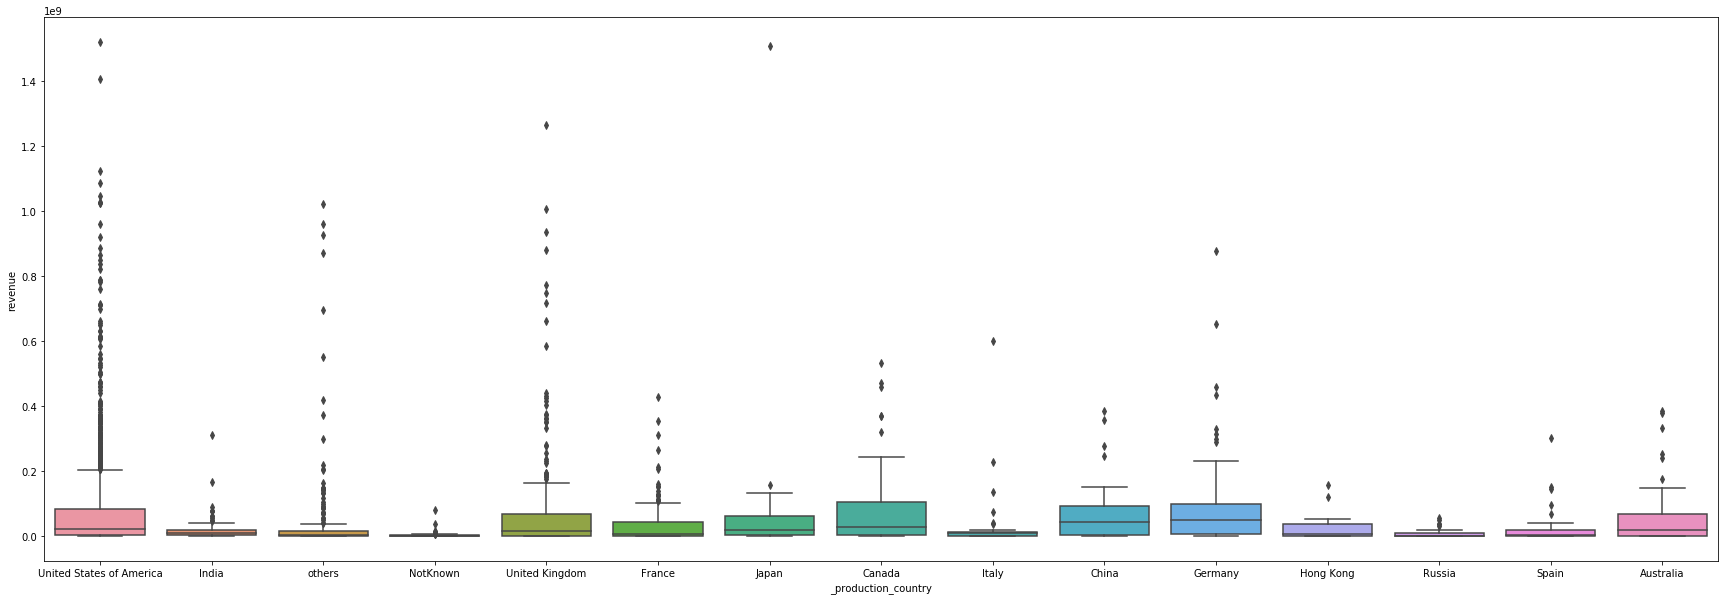

In [619]:
plt.figure(figsize=(30,10)) 
sb.boxplot(x='_production_country',y='revenue',data=dfinal)

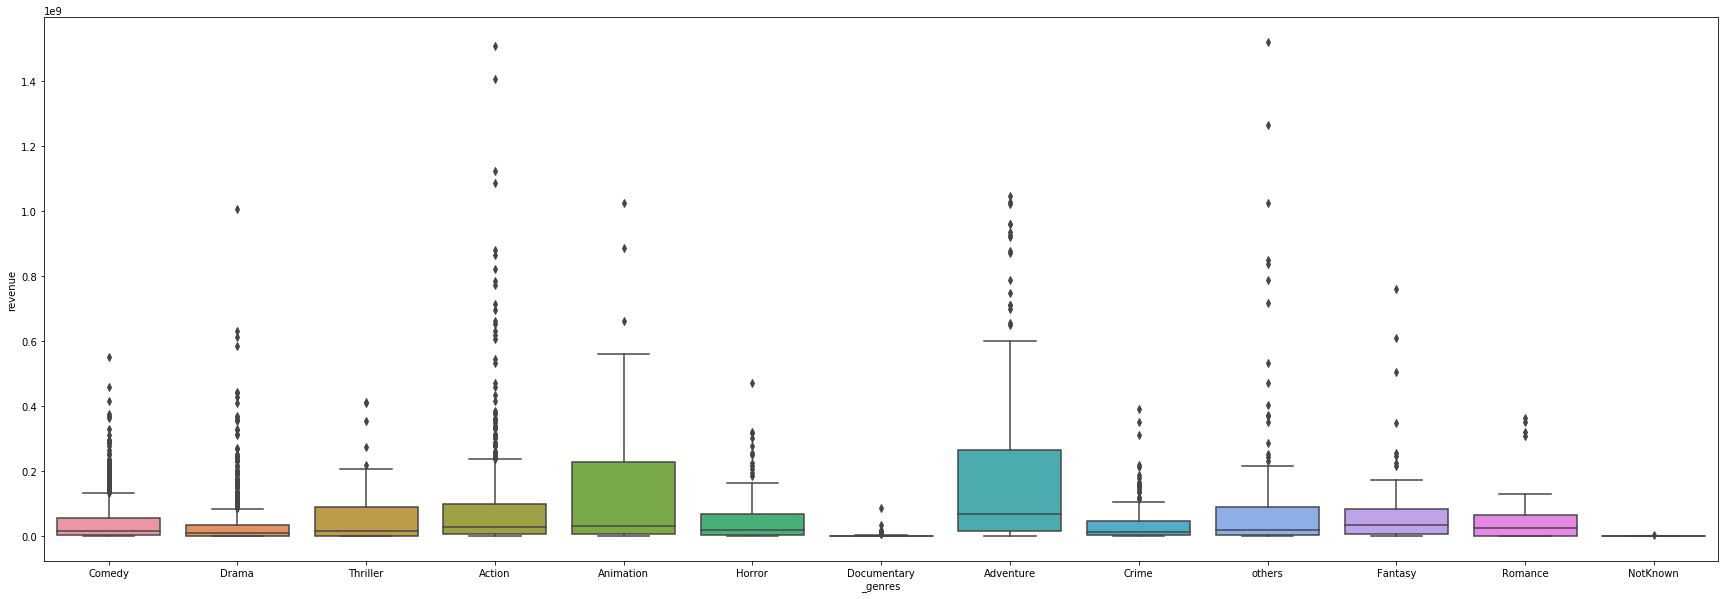

In [620]:
plt.figure(figsize=(30,10)) 
sb.boxplot(x='_genres',y='revenue',data=dfinal)

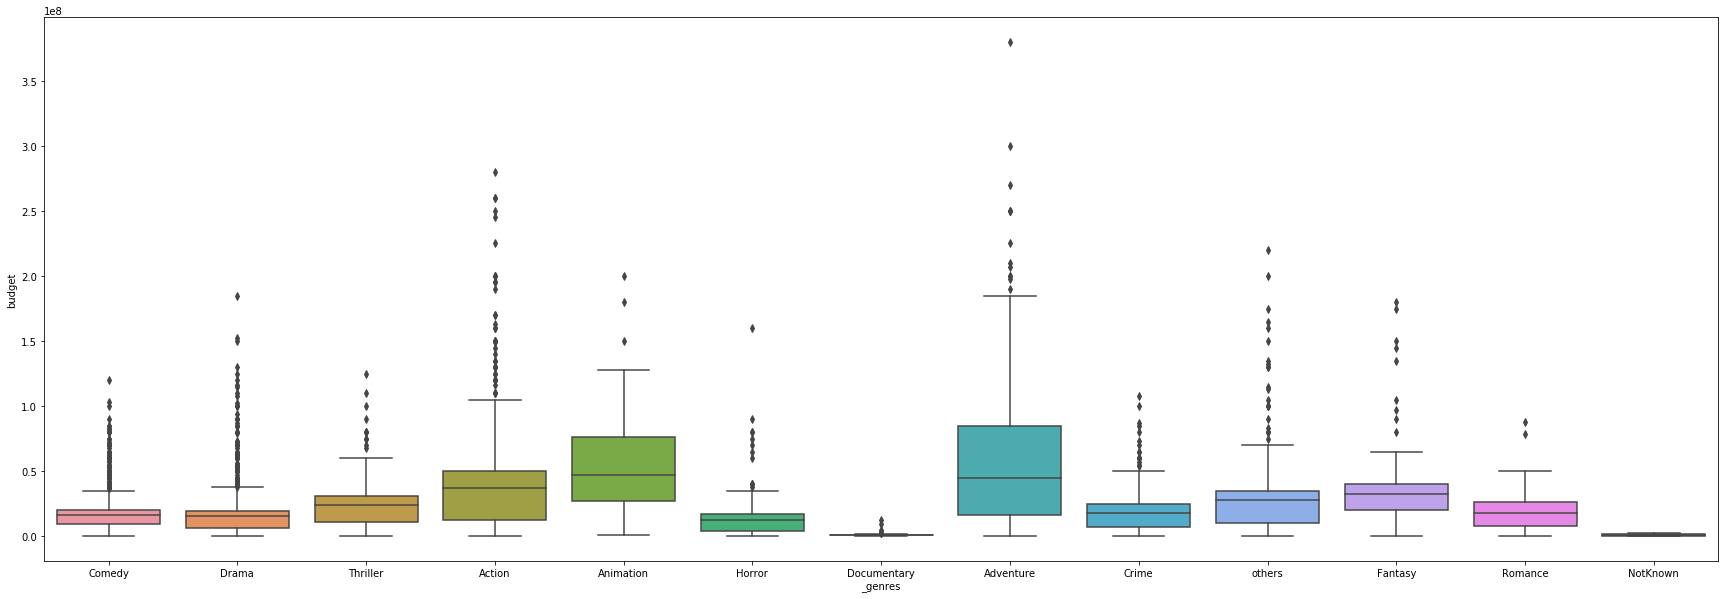

In [621]:
plt.figure(figsize=(30,10)) 
sb.boxplot(x='_genres',y='budget',data=dfinal)

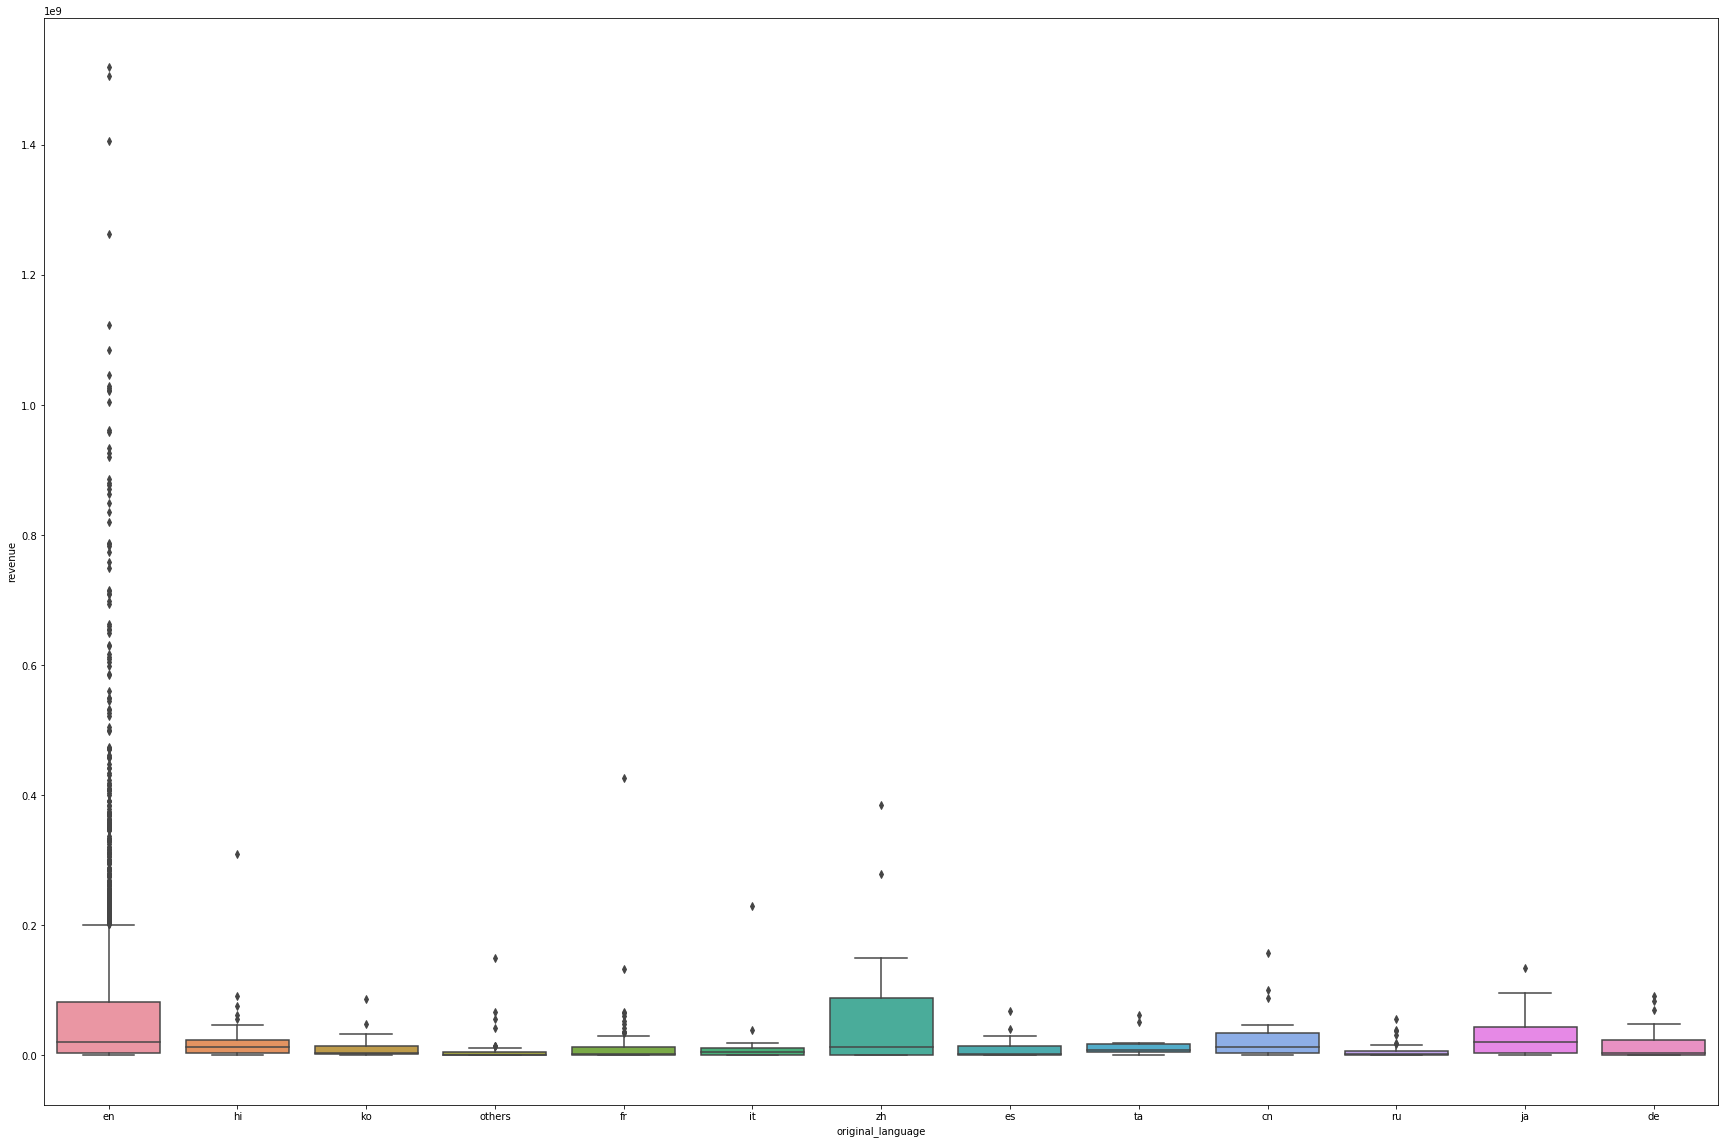

In [622]:
plt.figure(figsize=(30,20)) 
sb.boxplot(x='original_language',y='revenue',data=dfinal)

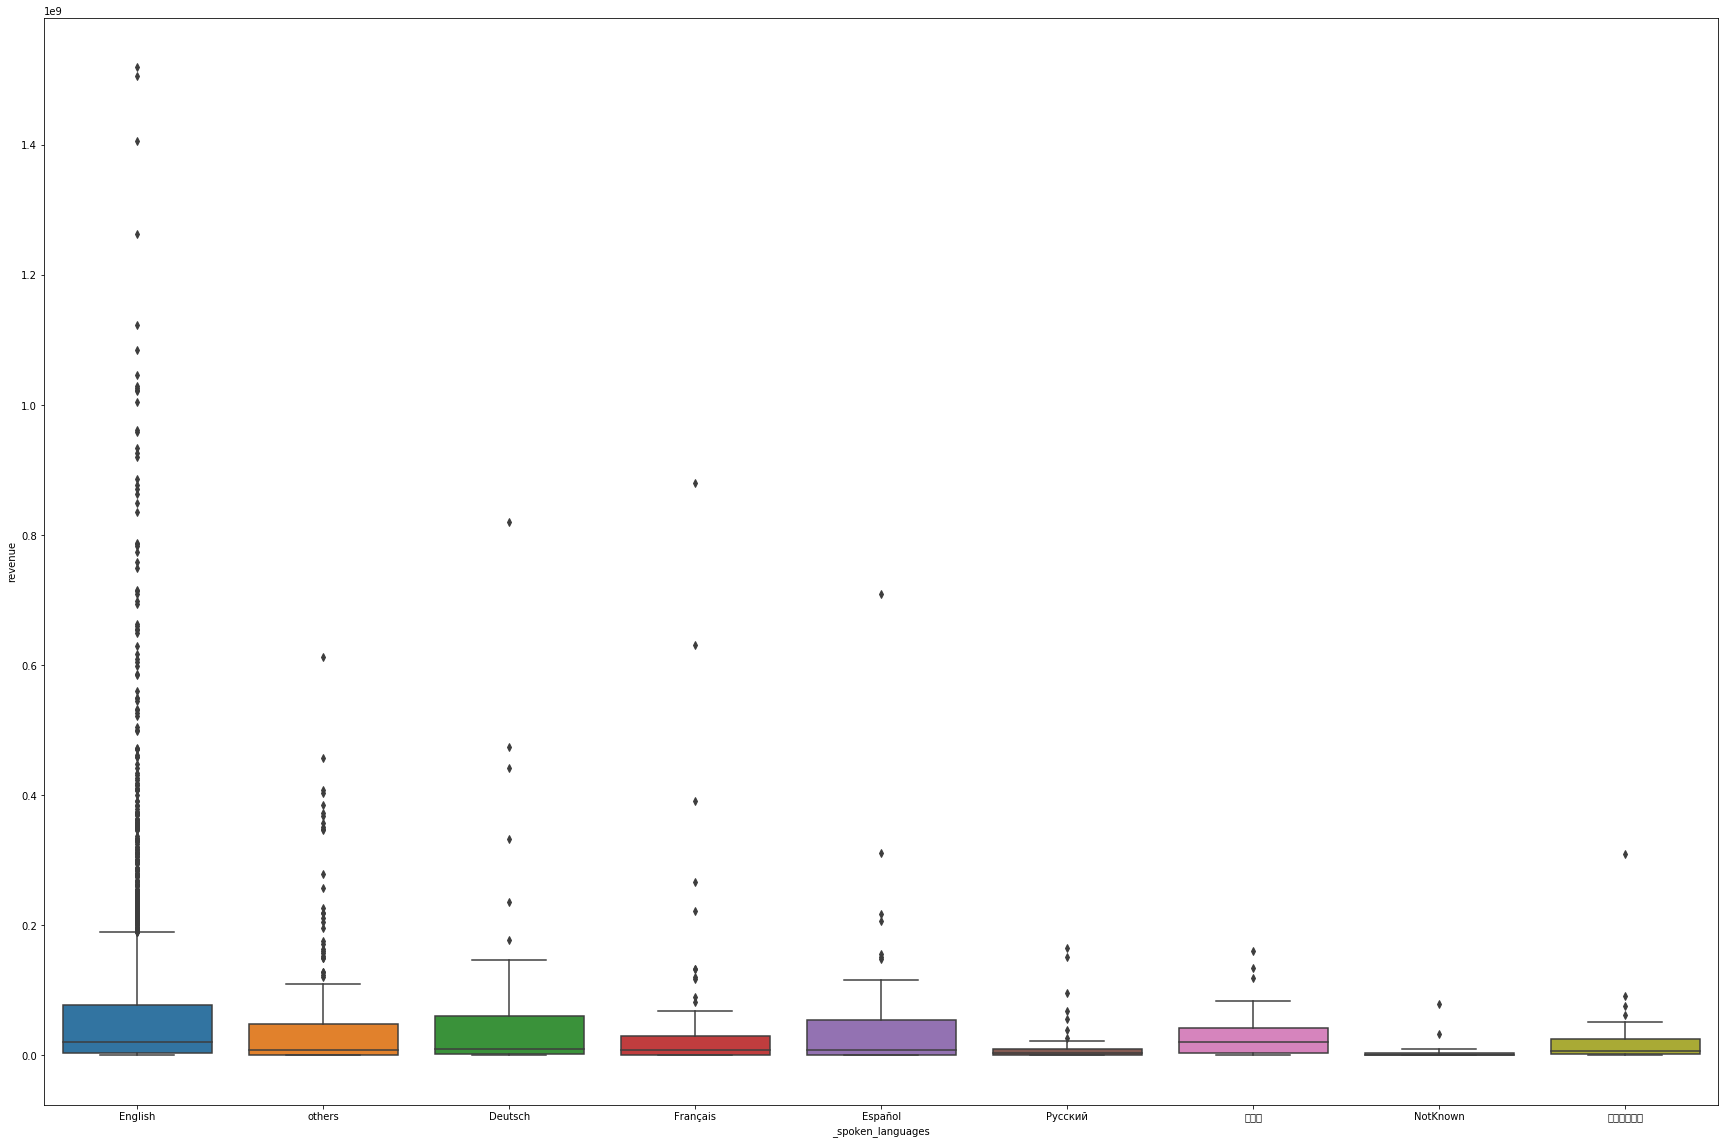

In [623]:
plt.figure(figsize=(30,20)) 
sb.boxplot(x='_spoken_languages',y='revenue',data=dfinal)

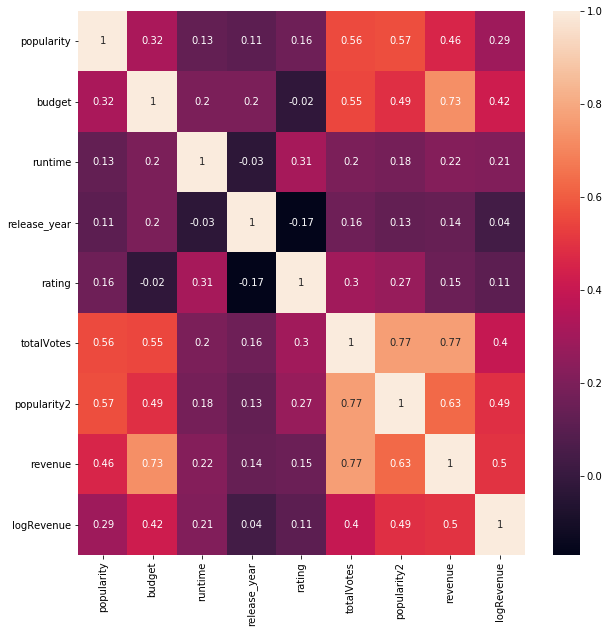

In [624]:
cols = dfinal[['popularity','budget','runtime','release_year','rating','totalVotes','popularity2','revenue','logRevenue']]
corr_matrix = cols.corr().round(2)
plt.figure(figsize=(10,10))
sb.heatmap(data = corr_matrix,annot = True)

In [625]:
pd.set_option('display.max_columns', None)
dfinal.head()

,id,budget,original_language,original_title,popularity,runtime,title,revenue,popularity2,rating,totalVotes,logRevenue,release_month,release_day,release_year,release_dayofweek,has_homepage,has_collection,_status,_genres,_total_genres,_production_company,_total_prod_comp,_production_country,_total_prod_countries,_spoken_languages,_total_spoken_languages,_keywords,_director,_lead
0,1,1.400000e+07,en,Hot Tub Time Machine 2,6.575393,93.0,Hot Tub Time Machine 2,12314651,10.400000,5.000000,482.000000,23.553872,2,20,2015,4,0,1,1,Comedy,1.0,Paramount Pictures,3.0,United States of America,1.0,English,1.0,time travel,Kelly Cantley,Rob Corddry
1,2,4.000000e+07,en,The Princess Diaries 2: Royal Engagement,8.248895,113.0,The Princess Diaries 2: Royal Engagement,95149435,15.229000,6.400000,1528.000000,26.503692,8,6,2004,4,0,1,1,Comedy,4.0,Walt Disney Pictures,1.0,United States of America,1.0,English,1.0,coronation,Garry Marshall,Anne Hathaway
2,3,3.300000e+06,en,Whiplash,64.299990,105.0,Whiplash,13092000,26.082000,8.400000,7314.000000,23.642182,10,10,2014,4,1,0,1,Drama,1.0,others,3.0,United States of America,1.0,English,1.0,jazz,Terri Taylor,Miles Teller
3,4,1.200000e+06,hi,Kahaani,3.174936,122.0,Kahaani,16000000,5.531000,7.500000,115.000000,23.931569,3,9,2012,4,1,0,1,Thriller,2.0,NotKnown,1.0,India,1.0,English,2.0,mystery,Sujoy Ghosh,Vidya Balan
4,5,3.584990e+07,ko,마린보이,1.148070,118.0,Marine Boy,3923970,8.029303,6.366308,933.938584,21.903883,2,5,2009,3,0,0,1,Action,2.0,NotKnown,1.0,others,1.0,others,1.0,notavailable,Jong-seok Yoon,Kim Kang-woo


In [626]:
dfinal['_keywords'].value_counts()

notavailable                    276
based on novel                   56
independent film                 42
prison                           41
new york                         40
paris                            37
sex                              34
london england                   32
female nudity                    29
suicide                          28
father son relationship          26
gay                              25
love triangle                    24
corruption                       22
brother brother relationship     22
woman director                   21
male nudity                      19
sport                            19
biography                        18
detective                        17
holiday                          17
competition                      16
california                       15
robbery                          15
saving the world                 15
musical                          14
rape                             14
cia                         

In [627]:
counts = dfinal['_keywords'].value_counts().to_dict()
counts
result = train_modifier('_keywords',counts,27)
dfinal['_keywords'] = result
dfinal['_keywords'].describe()

count       3000
unique        11
top       others
freq        2385
Name: _keywords, dtype: object

In [628]:
counts = testfinal['_keywords'].value_counts().to_dict()
counts


{'notavailable': 393,
 'based on novel': 94,
 'new york': 64,
 'prison': 54,
 'london england': 51,
 'female nudity': 50,
 'independent film': 46,
 'suicide': 44,
 'paris': 43,
 'sex': 40,
 'holiday': 32,
 'musical': 31,
 'father son relationship': 31,
 'corruption': 30,
 'woman director': 30,
 'martial arts': 30,
 'brother brother relationship': 29,
 'male nudity': 29,
 'robbery': 27,
 'biography': 24,
 'gay': 24,
 'witch': 24,
 'saving the world': 24,
 'sport': 22,
 'monster': 22,
 'france': 21,
 'japan': 19,
 'rape': 19,
 'alcohol': 18,
 'hotel': 17,
 'individual': 17,
 'usa': 17,
 'sheriff': 16,
 'spy': 16,
 'bomb': 16,
 'suspense': 15,
 'terror': 15,
 'dancing': 15,
 'california': 15,
 'detective': 15,
 'underdog': 15,
 'africa': 15,
 'san francisco': 14,
 'competition': 14,
 'baseball': 14,
 'gambling': 14,
 'prostitute': 14,
 'world war ii': 14,
 'journalist': 13,
 'england': 13,
 'usa president': 12,
 'kidnapping': 12,
 'beach': 12,
 'sequel': 12,
 'nurse': 12,
 'magic': 12,
 '

In [629]:
result = test_modifier('_keywords',counts,39)
testfinal['_keywords'] = result
testfinal['_keywords'].describe()

count       4398
unique        11
top       others
freq        3519
Name: _keywords, dtype: object

In [630]:
dfinal.drop(['_lead'],axis=1,inplace=True)

In [631]:
testfinal.drop(['_lead'],axis=1,inplace = True)

In [632]:
dfinal.drop(['_director'],axis=1,inplace=True)

In [633]:
testfinal.drop(['_director'],axis=1,inplace=True)

## One hot encoding

In [634]:
dfinal=pd.get_dummies(dfinal,columns=['original_language','_production_company','_genres','_production_country','_spoken_languages'])

In [635]:
dfinal=pd.get_dummies(dfinal,columns=['_keywords'])

In [636]:
testfinal = pd.get_dummies(testfinal,columns = ['_keywords','original_language','_production_company','_genres','_production_country','_spoken_languages'])

In [637]:
dfinal.drop(['original_title','title'],axis=1,inplace=True)

In [638]:
testfinal.drop(['original_title','title','status'],axis=1,inplace=True)

In [639]:
dfinal.head()

,id,budget,popularity,runtime,revenue,popularity2,rating,totalVotes,logRevenue,release_month,release_day,release_year,release_dayofweek,has_homepage,has_collection,_status,_total_genres,_total_prod_comp,_total_prod_countries,_total_spoken_languages,original_language_cn,original_language_de,original_language_en,original_language_es,original_language_fr,original_language_hi,original_language_it,original_language_ja,original_language_ko,original_language_others,original_language_ru,original_language_ta,original_language_zh,_production_company_Columbia Pictures,_production_company_Columbia Pictures Corporation,_production_company_Metro-Goldwyn-Mayer (MGM),_production_company_Miramax Films,_production_company_New Line Cinema,_production_company_NotKnown,_production_company_Paramount Pictures,_production_company_TriStar Pictures,_production_company_Twentieth Century Fox Film Corporation,_production_company_United Artists,_production_company_Universal Pictures,_production_company_Walt Disney Pictures,_production_company_Warner Bros.,_production_company_others,_genres_Action,_genres_Adventure,_genres_Animation,_genres_Comedy,_genres_Crime,_genres_Documentary,_genres_Drama,_genres_Fantasy,_genres_Horror,_genres_NotKnown,_genres_Romance,_genres_Thriller,_genres_others,_production_country_Australia,_production_country_Canada,_production_country_China,_production_country_France,_production_country_Germany,_production_country_Hong Kong,_production_country_India,_production_country_Italy,_production_country_Japan,_production_country_NotKnown,_production_country_Russia,_production_country_Spain,_production_country_United Kingdom,_production_country_United States of America,_production_country_others,_spoken_languages_Deutsch,_spoken_languages_English,_spoken_languages_Español,_spoken_languages_Français,_spoken_languages_NotKnown,_spoken_languages_Pусский,_spoken_languages_others,_spoken_languages_हिन्दी,_spoken_languages_日本語,_keywords_based on novel,_keywords_female nudity,_keywords_independent film,_keywords_london england,_keywords_new york,_keywords_notavailable,_keywords_others,_keywords_paris,_keywords_prison,_keywords_sex,_keywords_suicide
0,1,1.400000e+07,6.575393,93.0,12314651,10.400000,5.000000,482.000000,23.553872,2,20,2015,4,0,1,1,1.0,3.0,1.0,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2,4.000000e+07,8.248895,113.0,95149435,15.229000,6.400000,1528.000000,26.503692,8,6,2004,4,0,1,1,4.0,1.0,1.0,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,3,3.300000e+06,64.299990,105.0,13092000,26.082000,8.400000,7314.000000,23.642182,10,10,2014,4,1,0,1,1.0,3.0,1.0,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,1.200000e+06,3.174936,122.0,16000000,5.531000,7.500000,115.000000,23.931569,3,9,2012,4,1,0,1,2.0,1.0,1.0,2.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,5,3.584990e+07,1.148070,118.0,3923970,8.029303,6.366308,933.938584,21.903883,2,5,2009,3,0,0,1,2.0,1.0,1.0,1.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [640]:
testfinal.head()

,id,budget,popularity,runtime,popularity2,rating,totalVotes,release_month,release_day,release_year,release_dayofweek,has_homepage,has_collection,_status,_total_genres,_total_prod_comp,_total_prod_countries,_total_spoken_languages,_keywords_based on novel,_keywords_female nudity,_keywords_independent film,_keywords_london england,_keywords_new york,_keywords_notavailable,_keywords_others,_keywords_paris,_keywords_prison,_keywords_sex,_keywords_suicide,original_language_cn,original_language_de,original_language_en,original_language_es,original_language_fr,original_language_hi,original_language_it,original_language_ja,original_language_ko,original_language_others,original_language_ru,original_language_ta,original_language_zh,_production_company_Columbia Pictures,_production_company_Columbia Pictures Corporation,_production_company_Metro-Goldwyn-Mayer (MGM),_production_company_Miramax Films,_production_company_New Line Cinema,_production_company_NotKnown,_production_company_Paramount Pictures,_production_company_TriStar Pictures,_production_company_Twentieth Century Fox Film Corporation,_production_company_United Artists,_production_company_Universal Pictures,_production_company_Walt Disney Pictures,_production_company_Warner Bros.,_production_company_others,_genres_Action,_genres_Adventure,_genres_Animation,_genres_Comedy,_genres_Crime,_genres_Documentary,_genres_Drama,_genres_Fantasy,_genres_Horror,_genres_NotKnown,_genres_Romance,_genres_Thriller,_genres_others,_production_country_Australia,_production_country_Canada,_production_country_China,_production_country_France,_production_country_Germany,_production_country_Hong Kong,_production_country_India,_production_country_Italy,_production_country_Japan,_production_country_NotKnown,_production_country_Russia,_production_country_Spain,_production_country_United Kingdom,_production_country_United States of America,_production_country_others,_spoken_languages_Deutsch,_spoken_languages_English,_spoken_languages_Español,_spoken_languages_Français,_spoken_languages_NotKnown,_spoken_languages_Pусский,_spoken_languages_others,_spoken_languages_हिन्दी,_spoken_languages_日本語
0,3001,5.349254e+07,3.851534,90.0,6.468,6.6,91.0,7,14,2007,5.0,1,1,1,4.0,1.0,2.0,2.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,3002,8.800000e+04,3.559789,65.0,3.649,4.5,51.0,5,19,1958,6.0,0,0,1,2.0,1.0,1.0,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
2,3003,1.503683e+07,8.085194,100.0,9.012,6.1,176.0,5,23,1997,4.0,0,0,1,2.0,3.0,1.0,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
3,3004,6.800000e+06,8.596012,130.0,10.923,8.0,937.0,9,4,2010,5.0,1,0,1,3.0,3.0,2.0,3.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,3005,2.000000e+06,3.217680,92.0,5.692,6.8,50.0,2,11,2005,4.0,0,0,1,2.0,1.0,1.0,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0


In [641]:
dfinal.shape

(3000, 95)

In [643]:
testfinal.shape

(4398, 93)

In [645]:
#dfinal.to_csv('dfinal.csv')

In [646]:
#testfinal.to_csv('testfinal.csv')